# Numerical solution of ODEs - Mass-spring-damper system

by Xiaofeng Liu, Ph.D., P.E.
Associate Professor

Department of Civil and Environmental Engineering

Institute of CyberScience

Penn State University 

223B Sackett Building, University Park, PA 16802

Web: http://water.engr.psu.edu/liu/

---

## Mass-Spring-Damper system dynamics

This Jupyter Notebook implements and demonstrates numerical solution of ODEs for the mass-spring-damper systems. 

## Python libraries and functions for ODEs

Scipy proives the "derivative(...)" function to evaluate the derivative using central differencing with different orders. 
[scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

### Mass-Spring-Damper system without external forcing

The $F=ma$ for this system is:
    \begin{equation}
    m \frac{d^2 s}{dt^2} = -k s - \lambda \frac{ds}{dt}
    \end{equation}
    where on the left, the first term is the spring force and the second is the damper force.

<img src="mass-spring-damper.png" width=400>
<h3 align="center">Figure. Mass-Spring-Damper system without external forcing.</h3> 

The governing equation can be written as
\begin{equation}
  \frac{d^2 s}{dt^2} = - \frac{\lambda}{m} \frac{ds}{dt} -\frac{k}{m} s 
\end{equation}

Let
\begin{equation}
   y_1 = s, \textrm{ and } y_2 = \frac{ds}{dt} = \frac{dy_1}{dt}
\end{equation}
then the 2$^{nd}$-order ODE can be written as a 1$^{st}$-order ODE system as
\begin{eqnarray}
\frac{d y_1}{d t} &=& y_2 \\
\frac{d y_2}{d t} &=& -\frac{k}{m} y_1 - \frac{\lambda}{m} y_2
\end{eqnarray}

An initial condition for both $y_1$ and $y_2$, i.e., the initial displacement and velocity are needed as
\begin{eqnarray}
 y_1(t=0) &=& y_{1,0} \\
 y_2(t=0) &=& y_{2,0}
\end{eqnarray}


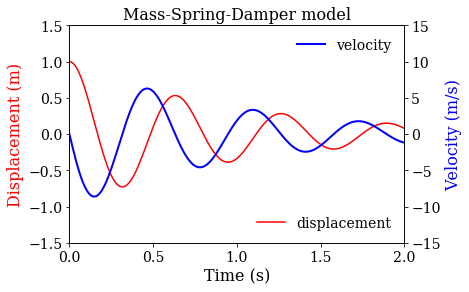

In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)  #allow the use of Latex for math expressions and equations
plt.rc('font', family='serif') #specify the default font family to be "serif"


# dy1/dt =  y2
# dy2/dt = -k/m y1 - lambda1/m y2 

# *  y1: displacement
# 
# *  y2: velocity  
#   
# * lambda, k, and m are constant parameters defining the behavior of the system:    
# 
#   + lambda1 is the damper constant (use lambda1 instead of lambda because it is used in Python)
# 
#   + k is the spring constant
# 
#   + m is the mass 
# 

def dY_dt(Y, t, lambda1,k,m):
    return [ Y[1], -k/m*Y[0] - lambda1/m*Y[1] ]


k=100      # spring constant, N/m
m=1.0      # mass, kg
lambda1=2  # damping coefficient 
#lambda1=0  # damping coefficient 

t = np.linspace(0, 2, 200)              # time
Y0 = [1.0, 0.0]         # initials conditions: [displacement (m), velocity (m/s)]

Y, infodict = integrate.odeint(dY_dt, Y0, t, args=(lambda1,k,m), full_output=True)

s, velocity = Y.T

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(t,s,'r-',label = 'displacement')

ax2.plot(t,velocity,'b-',label = 'velocity', linewidth=2.0)

#set x and y axes label and font size
ax1.set_xlabel('Time (s)',fontsize=16)
ax1.set_ylabel('Displacement (m)',fontsize=16,color='r')
ax2.set_ylabel('Velocity (m/s)',fontsize=16,color='b')

#set the limit for the x and y axes
ax1.set_xlim([0,2])
#ax1.set_ylim([-0.8,1])
#ax2.set_ylim([-9,7])
ax1.set_ylim([-1.5,1.5])
ax2.set_ylim([-15,15])

#show the ticks on both axes and set the font size 
ax1.tick_params(labelsize=14)
ax2.tick_params(axis="y", labelsize=14)

#show title and set font size
plt.title('Mass-Spring-Damper model',fontsize=16)

#plt.grid()

#show legend, set its location, font size, and turn off the frame
ax1.legend(loc='lower right',fontsize=14,frameon=False)
ax2.legend(loc='upper right',fontsize=14,frameon=False)

#plt.savefig("mass-spring-damper-model.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.savefig("mass-spring-damper-model-overdamping.png",dpi=300, bbox_inches='tight', pad_inches=0)
plt.show()
